In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# create a function to start a new game
def start_game():
  board = np.zeros(9, dtype = int)
  return board

In [4]:
# create a function to find available moves
def available_moves(board):
  moves = [s for s, v in enumerate(board) if v == 0]
  return moves

In [ ]:
board = start_game()

In [ ]:
board[4] = 1
board[6] = -1

In [ ]:
available_moves(test)

[0, 1, 2, 3, 5, 7, 8]

In [ ]:
board[7] = 1

In [5]:
# create a function to check for a winner
def check_winner(board):
  win_combos = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
  winner = 'No Winner'
  for line in win_combos:
    s = board[line[0]] + board[line[1]] + board[line[2]]
    if s == 3:
      winner = 'Player X'
      break
    elif s == -3:
      winner = 'Player O'
      break
  if (not any(s == 0 for s in list(board))) & (winner == 'No Winner'):
    winner = 'Draw'
  return winner

In [ ]:
check_winner(board)

'No Winner'

In [ ]:
test = start_game()
test[0] = 1
test[1] = -1
test[2] = 1
test[3] = -1
test[4] = 1
test[5] = -1
test[6] = -1
test[7] = 1
test[8] = -1
check_winner(test)

'Draw'

In [6]:
# create a function to visualize the board
def view_board(board):
  xo = list('         ')
  for i in range(9):
    if board[i] == 1:
      xo[i] = 'X'
    elif board[i] == -1:
      xo[i] = 'O'
  
  print('    {} | {} | {}'.format(xo[0], xo[1], xo[2]))
  print('  -------------')
  print('    {} | {} | {}'.format(xo[3], xo[4], xo[5]))
  print('  -------------')
  print('    {} | {} | {}'.format(xo[6], xo[7], xo[8]))

In [ ]:
board[0] = 1
board[1] = 0
board[2] = 0
board[3] = -1
board[4] = 1
board[5] = 0
board[6] = -1
board[7] = 0
board[8] = 1

In [ ]:
view_board(board)

    X |   |  
  -------------
    O | X |  
  -------------
    O |   | X


In [ ]:
check_winner(board)

'Player X'

In [7]:
# attempt at mapping the board to a unique index for the q table
def get_index(board):
  # can use base 3 since each of the nine board positions can only have 3 distinct values
  place = [3**8, 3**7, 3**6, 3**5, 3**4, 3**3, 3**2, 3**1, 3**0]
  mapped_board = np.zeros(9, dtype = int)
  for i in range(9):
    if board[i] == -1:
      mapped_board[i] = 2
    else:
      mapped_board[i] = board[i]
  idx = np.dot(mapped_board, place)
  return idx

In [ ]:
test = start_game()
test[0] = -1
test[1] = -1
test[2] = -1
test[3] = -1
test[4] = -1
test[5] = -1
test[6] = -1
test[7] = -1
test[8] = -1
get_index(test)

19682

In [ ]:
available_moves(test)

[]

In [ ]:
board = start_game()
get_index(board)

0

In [ ]:
board[6] = 1
board[8] = -1
view_board(board)

      |   |  
  -------------
      |   |  
  -------------
    X |   | O


In [ ]:
get_index(board)

11

In [8]:
# define reward function from player X's perspective
def get_reward(board, player):
  winner = check_winner(board)
  reward = 0
  if player == 'X':
    if winner == 'Player X':
      reward = 1
    elif winner == 'Player O':
      reward = -1
    elif winner == 'Draw':
      reward = 0.5
  elif player == 'O':
    if winner == 'Player X':
      reward = -1
    elif winner == 'Player O':
      reward = 1
    elif winner == 'Draw':
      reward = 0.5
  else:
    reward = -50000
  return reward

In [ ]:
# set up loop variables

# number of games
Games = 100000

# scores table to tally game results
scores = pd.DataFrame({'Game': [*range(1, Games + 1)],
                      'Player X Wins': np.zeros(Games, dtype=int),
                      'Player O Wins': np.zeros(Games, dtype=int),
                      'Draws': np.zeros(Games, dtype=int),
                      'Player X Win %': np.zeros(Games, dtype=float),
                      'Player O Win %': np.zeros(Games, dtype=float),
                      'Draw %': np.zeros(Games, dtype=float)})

# Q table is initialized with zeros and has 19683 rows since 19682 is the max index and there are at most 9 available actions (one for each spot)
Qa = np.zeros((19683, 9), dtype=float)

# learning rate
gamma = 0.05

# epsilon parameter for greedy decision making
# could set a decreasing value where it makes the random move less often over time, something like eps = 0.5 / sqrt(i) in the loop
eps = 0.2

In [ ]:
scores

,Game,Player X Wins,Player O Wins,Draws,Player X Win %,Player O Win %,Draw %
0,1,0,0,0,0.0,0.0,0.0
1,2,0,0,0,0.0,0.0,0.0
2,3,0,0,0,0.0,0.0,0.0
3,4,0,0,0,0.0,0.0,0.0
4,5,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
996,997,0,0,0,0.0,0.0,0.0
997,998,0,0,0,0.0,0.0,0.0
998,999,0,0,0,0.0,0.0,0.0
999,1000,0,0,0,0.0,0.0,0.0


In [ ]:
# train agent X

# play the number of specified games
for i in range(Games):
  
  # create a new game
  board = start_game()
  winner = 'No Winner'

  # make moves until there is a result in the current game
  while winner == 'No Winner':
    # check available moves for our agent
    avail_moves = available_moves(board)

    # decide if turn will be a random move or best move
    # if random, choose an available move randomly
    # if best, get index of Q table from current board and pick highest value among the columns of the available moves
    if np.random.uniform(0,1,1) >= eps:
      idx = int(get_index(board))
      for k in avail_moves:
        vals = np.zeros(9, dtype=float)
        vals[k] = Qa[idx, k]
        move = np.argmax(vals)
    else:
      move = random.choice(avail_moves)

    # update board
    board[move] = 1
    next_idx = int(get_index(board))

    # check if move results in a win
    winner = check_winner(board)
    
    # if no win/draw: 
      # opponent gets available moves
      # opponent randomly picks a move from available moves
      # update board
      # check if move results in a win
    if winner == 'No Winner':
      opp_avail_moves = available_moves(board)
      opp_move = random.choice(opp_avail_moves)
      board[opp_move] = -1
      winner = check_winner(board)
      next_idx = int(get_index(board))

    # get reward
    reward = get_reward(board, 'X')

    # update Q table for the board and move combination
    Qa[idx, move] = (1-gamma)*Qa[idx, move] + gamma*(reward + max(Qa[next_idx,:]))

    # repeat until there is a win or a draw

  # update scores table in row i for result of game i
  if i == 0:
    if winner == 'Player X':
      scores.loc[i, 'Player X Wins'] = 1
      scores.loc[i, 'Player O Wins'] = 0
      scores.loc[i, 'Draws'] = 0
    elif winner == 'Player O':
      scores.loc[i, 'Player X Wins'] = 0
      scores.loc[i, 'Player O Wins'] = 1
      scores.loc[i, 'Draws'] = 0
    else:
      scores.loc[i, 'Player X Wins'] = 0
      scores.loc[i, 'Player O Wins'] = 0
      scores.loc[i, 'Draws'] = 1
  else:
    if winner == 'Player X':
      scores.loc[i, 'Player X Wins'] = scores.loc[i - 1, 'Player X Wins'] + 1
      scores.loc[i, 'Player O Wins'] = scores.loc[i - 1, 'Player O Wins']
      scores.loc[i, 'Draws'] = scores.loc[i - 1, 'Draws']
    elif winner == 'Player O':
      scores.loc[i, 'Player X Wins'] = scores.loc[i - 1, 'Player X Wins']
      scores.loc[i, 'Player O Wins'] = scores.loc[i - 1, 'Player O Wins'] + 1
      scores.loc[i, 'Draws'] = scores.loc[i - 1, 'Draws']
    else:
      scores.loc[i, 'Player X Wins'] = scores.loc[i - 1, 'Player X Wins']
      scores.loc[i, 'Player O Wins'] = scores.loc[i - 1, 'Player O Wins']
      scores.loc[i, 'Draws'] = scores.loc[i - 1, 'Draws'] + 1
  
  scores.loc[i, 'Player X Win %'] = scores.loc[i, 'Player X Wins'] / scores.loc[i, 'Game']
  scores.loc[i, 'Player O Win %'] = scores.loc[i, 'Player O Wins'] / scores.loc[i, 'Game']
  scores.loc[i, 'Draw %'] = scores.loc[i, 'Draws'] / scores.loc[i, 'Game']

  # every 10000 games print scores row for latest game to see learning progress
  if (i > 9999) and (i % 10000 == 0):
    print('Player X Win % at', i, 'games:', scores.loc[i, 'Player X Win %'])
    print('Player O Win % at', i, 'games:', scores.loc[i, 'Player O Win %'])
    print('Draw % at', i, 'games:', scores.loc[i, 'Draw %'])
  # repeat until max number of games is reached


Player X Win % at 10000 games: 0.47335266473352666
Player O Win % at 10000 games: 0.5083491650834917
Draw % at 10000 games: 0.0182981701829817
Player X Win % at 20000 games: 0.5634718264086795
Player O Win % at 20000 games: 0.40997950102494873
Draw % at 20000 games: 0.02654867256637168
Player X Win % at 30000 games: 0.6046465117829406
Player O Win % at 30000 games: 0.3634212192926902
Draw % at 30000 games: 0.031932268924369185
Player X Win % at 40000 games: 0.6293592660183496
Player O Win % at 40000 games: 0.3351416214594635
Draw % at 40000 games: 0.035499112522186946
Player X Win % at 50000 games: 0.6461870762584748
Player O Win % at 50000 games: 0.31599368012639745
Draw % at 50000 games: 0.037819243615127694
Player X Win % at 60000 games: 0.6576557057382377
Player O Win % at 60000 games: 0.3028116198063366
Draw % at 60000 games: 0.03953267445542574
Player X Win % at 70000 games: 0.66647619319724
Player O Win % at 70000 games: 0.2923672518964015
Draw % at 70000 games: 0.04115655490635

In [ ]:
from google.colab import files
scores.to_csv('X_scores.csv') 
files.download('X_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

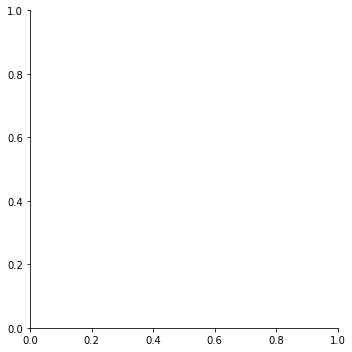

In [ ]:
# plot X win % only
ax = sns.catplot(x= 'Game', y = 'Player X Win %', data = scores, kind='point')

In [ ]:
percent_cols = ['Game','Player X Win %', 'Player O Win %', 'Draw %']
scores_percents = scores[percent_cols]
scores_percents = scores_percents.melt('Game', var_name='Percentages',  value_name='vals')

In [ ]:
# plot all three %'s at once
ax = sns.catplot(x= 'Game', y = 'vals', hue = 'Percentages', data = scores_percents, kind='point')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f890adc6840> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
empty_board = start_game()
idx = get_index(empty_board)
Qa[idx, :]


array([0.47305547, 0.35042814, 0.52425649, 0.49079661, 0.81127056,
       0.41021182, 0.83648436, 0.86026506, 0.95360799])

In [ ]:
Qa[:10]

array([[ 0.47305547,  0.35042814,  0.52425649,  0.49079661,  0.81127056,
         0.41021182,  0.83648436,  0.86026506,  0.95360799],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.07074741, -0.00404657,  0.04023485, -0.03523965,  0.01175822,
         0.00159719,  0.0415509 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.41268535,  0.56984635,  0.46011802,  0.78029217,  0

Learning:
- Start game
- Agent gets available moves
- Agent either picks a random available move or checks Q table for best move (state is the board, action is the location of move)
- Check for winner
- If winner or draw, record result and break
- If no winner, opponent picks next move from available moves (either randomly or through Q table)
- Check for winner
- Repeat until game ends
- Give reward

Loop 3000 times or something 

Potentially need to figure out a more efficient way to take the state variable (our 1x9 array of 1, 0, -1) and map to index of Q table
- Current get_index function would require a Q matrix roughly of size (200M, 9)

In [9]:
# set up loop variables

# number of games
Games = 100000

# scores table to tally game results
scores_O = pd.DataFrame({'Game': [*range(1, Games + 1)],
                      'Player X Wins': np.zeros(Games, dtype=int),
                      'Player O Wins': np.zeros(Games, dtype=int),
                      'Draws': np.zeros(Games, dtype=int),
                      'Player X Win %': np.zeros(Games, dtype=float),
                      'Player O Win %': np.zeros(Games, dtype=float),
                      'Draw %': np.zeros(Games, dtype=float)})

# Q table is initialized with zeros and has 19683 rows since 19682 is the max index and there are at most 9 available actions (one for each spot)
Qb = np.zeros((19683, 9), dtype=float)

# learning rate
gamma = 0.05

# epsilon parameter for greedy decision making
# could set a decreasing value where it makes the random move less often over time, something like eps = 0.5 / sqrt(i) in the loop
eps = 0.2

In [10]:
# train agent O

# play the number of specified games
for i in range(Games):
  
  # create a new game
  board = start_game()
  winner = 'No Winner'

  # player X makes first move at random
  move = random.choice(range(9))
  board[move] = 1

  # make moves until there is a result in the current game
  while winner == 'No Winner':
    # check available moves for our agent
    avail_moves = available_moves(board)

    # decide if turn will be a random move or best move
    # if random, choose an available move randomly
    # if best, get index of Q table from current board and pick highest value among the columns of the available moves
    if np.random.uniform(0,1,1) >= eps:
      idx = int(get_index(board))
      for k in avail_moves:
        vals = np.zeros(9, dtype=float)
        vals[k] = Qb[idx, k]
        move = np.argmax(vals)
    else:
      move = random.choice(avail_moves)

    # update board
    board[move] = -1
    next_idx = int(get_index(board))

    # check if move results in a win
    winner = check_winner(board)
    
    # if no win/draw: 
      # opponent gets available moves
      # opponent randomly picks a move from available moves
      # update board
      # check if move results in a win
    if winner == 'No Winner':
      opp_avail_moves = available_moves(board)
      opp_move = random.choice(opp_avail_moves)
      board[opp_move] = 1
      winner = check_winner(board)
      next_idx = int(get_index(board))

    # get reward
    reward = get_reward(board, 'O')

    # update Q table for the board and move combination
    Qb[idx, move] = (1-gamma)*Qb[idx, move] + gamma*(reward + max(Qb[next_idx,:]))

    # repeat until there is a win or a draw

  # update scores table in row i for result of game i
  if i == 0:
    if winner == 'Player X':
      scores_O.loc[i, 'Player X Wins'] = 1
      scores_O.loc[i, 'Player O Wins'] = 0
      scores_O.loc[i, 'Draws'] = 0
    elif winner == 'Player O':
      scores_O.loc[i, 'Player X Wins'] = 0
      scores_O.loc[i, 'Player O Wins'] = 1
      scores_O.loc[i, 'Draws'] = 0
    else:
      scores_O.loc[i, 'Player X Wins'] = 0
      scores_O.loc[i, 'Player O Wins'] = 0
      scores_O.loc[i, 'Draws'] = 1
  else:
    if winner == 'Player X':
      scores_O.loc[i, 'Player X Wins'] = scores_O.loc[i - 1, 'Player X Wins'] + 1
      scores_O.loc[i, 'Player O Wins'] = scores_O.loc[i - 1, 'Player O Wins']
      scores_O.loc[i, 'Draws'] = scores_O.loc[i - 1, 'Draws']
    elif winner == 'Player O':
      scores_O.loc[i, 'Player X Wins'] = scores_O.loc[i - 1, 'Player X Wins']
      scores_O.loc[i, 'Player O Wins'] = scores_O.loc[i - 1, 'Player O Wins'] + 1
      scores_O.loc[i, 'Draws'] = scores_O.loc[i - 1, 'Draws']
    else:
      scores_O.loc[i, 'Player X Wins'] = scores_O.loc[i - 1, 'Player X Wins']
      scores_O.loc[i, 'Player O Wins'] = scores_O.loc[i - 1, 'Player O Wins']
      scores_O.loc[i, 'Draws'] = scores_O.loc[i - 1, 'Draws'] + 1
  
  scores_O.loc[i, 'Player X Win %'] = scores_O.loc[i, 'Player X Wins'] / scores_O.loc[i, 'Game']
  scores_O.loc[i, 'Player O Win %'] = scores_O.loc[i, 'Player O Wins'] / scores_O.loc[i, 'Game']
  scores_O.loc[i, 'Draw %'] = scores_O.loc[i, 'Draws'] / scores_O.loc[i, 'Game']

  # every 10000 games print scores row for latest game to see learning progress
  if (i > 9999) and (i % 10000 == 0):
    print('Player X Win % at', i, 'games:', scores_O.loc[i, 'Player X Win %'])
    print('Player O Win % at', i, 'games:', scores_O.loc[i, 'Player O Win %'])
    print('Draw % at', i, 'games:', scores_O.loc[i, 'Draw %'])
  # repeat until max number of games is reached


Player X Win % at 10000 games: 0.8625137486251375
Player O Win % at 10000 games: 0.1294870512948705
Draw % at 10000 games: 0.007999200079992
Player X Win % at 20000 games: 0.7931103444827758
Player O Win % at 20000 games: 0.19649017549122544
Draw % at 20000 games: 0.0103994800259987
Player X Win % at 30000 games: 0.7456751441618613
Player O Win % at 30000 games: 0.241958601379954
Draw % at 30000 games: 0.012366254458184726
Player X Win % at 40000 games: 0.7144821379465514
Player O Win % at 40000 games: 0.2702932426689333
Draw % at 40000 games: 0.015224619384515387
Player X Win % at 50000 games: 0.6904461910761784
Player O Win % at 50000 games: 0.29129417411651765
Draw % at 50000 games: 0.018259634807303853
Player X Win % at 60000 games: 0.6708388193530108
Player O Win % at 60000 games: 0.3075448742520958
Draw % at 60000 games: 0.02161630639489342
Player X Win % at 70000 games: 0.652362109112727
Player O Win % at 70000 games: 0.3210096998614306
Draw % at 70000 games: 0.02662819102584248

In [ ]:
scores_O.to_csv('O_scores.csv') 
files.download('O_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# see Player B's Q table in response to Player A's optimal first move
board = start_game()
board[8] = 1
idx = get_index(board)
avail_moves = available_moves(board)
Qb[idx, avail_moves]

array([-0.05243507, -0.14727133, -0.02472848, -0.187422  ,  0.05432323,
       -0.03915681, -0.05619496,  0.20878838])

In [ ]:
# set up loop variables

# number of games
Games = 100000

# scores table to tally game results
scores_vs = pd.DataFrame({'Game': [*range(1, Games + 1)],
                      'Player X Wins': np.zeros(Games, dtype=int),
                      'Player O Wins': np.zeros(Games, dtype=int),
                      'Draws': np.zeros(Games, dtype=int),
                      'Player X Win %': np.zeros(Games, dtype=float),
                      'Player O Win %': np.zeros(Games, dtype=float),
                      'Draw %': np.zeros(Games, dtype=float)})

# learning rate
gamma = 0.05

# epsilon parameter for greedy decision making
# could set a decreasing value where it makes the random move less often over time, something like eps = 0.5 / sqrt(i) in the loop
eps = 0.1

In [ ]:
# train player X while playing against O

# play the number of specified games
for i in range(Games):
  
  # create a new game
  board = start_game()
  winner = 'No Winner'

  # make moves until there is a result in the current game
  while winner == 'No Winner':
    # check available moves for our agent
    avail_moves = available_moves(board)

    # decide if turn will be a random move or best move
    # if random, choose an available move randomly
    # if best, get index of Q table from current board and pick highest value among the columns of the available moves
    if np.random.uniform(0,1,1) >= eps:
      idx = int(get_index(board))
      for k in avail_moves:
        vals = np.zeros(9, dtype=float)
        vals[k] = Qa[idx, k]
        move = np.argmax(vals)
    else:
      move = random.choice(avail_moves)

    # update board
    board[move] = 1
    next_idx = int(get_index(board))

    # check if move results in a win
    winner = check_winner(board)
    
    # if no win/draw: 
      # opponent gets available moves
      # opponent takes action from available moves
      # update board
      # check if move results in a win
    if winner == 'No Winner':
      opp_avail_moves = available_moves(board)
      for k in opp_avail_moves:
        vals = np.zeros(9, dtype=float)
        vals[k] = Qb[next_idx, k]
        opp_move = np.argmax(vals)
      board[opp_move] = -1
      winner = check_winner(board)
      next_idx = int(get_index(board))

    # get reward
    reward = get_reward(board, 'X')

    # update Q table for the board and move combination
    Qa[idx, move] = (1-gamma)*Qa[idx, move] + gamma*(reward + max(Qa[next_idx,:]))

    # repeat until there is a win or a draw

  # update scores table in row i for result of game i
  if i == 0:
    if winner == 'Player X':
      scores_vs.loc[i, 'Player X Wins'] = 1
      scores_vs.loc[i, 'Player O Wins'] = 0
      scores_vs.loc[i, 'Draws'] = 0
    elif winner == 'Player O':
      scores_vs.loc[i, 'Player X Wins'] = 0
      scores_vs.loc[i, 'Player O Wins'] = 1
      scores_vs.loc[i, 'Draws'] = 0
    else:
      scores_vs.loc[i, 'Player X Wins'] = 0
      scores_vs.loc[i, 'Player O Wins'] = 0
      scores_vs.loc[i, 'Draws'] = 1
  else:
    if winner == 'Player X':
      scores_vs.loc[i, 'Player X Wins'] = scores_vs.loc[i - 1, 'Player X Wins'] + 1
      scores_vs.loc[i, 'Player O Wins'] = scores_vs.loc[i - 1, 'Player O Wins']
      scores_vs.loc[i, 'Draws'] = scores_vs.loc[i - 1, 'Draws']
    elif winner == 'Player O':
      scores_vs.loc[i, 'Player X Wins'] = scores_vs.loc[i - 1, 'Player X Wins']
      scores_vs.loc[i, 'Player O Wins'] = scores_vs.loc[i - 1, 'Player O Wins'] + 1
      scores_vs.loc[i, 'Draws'] = scores_vs.loc[i - 1, 'Draws']
    else:
      scores_vs.loc[i, 'Player X Wins'] = scores_vs.loc[i - 1, 'Player X Wins']
      scores_vs.loc[i, 'Player O Wins'] = scores_vs.loc[i - 1, 'Player O Wins']
      scores_vs.loc[i, 'Draws'] = scores_vs.loc[i - 1, 'Draws'] + 1
  
  scores_vs.loc[i, 'Player X Win %'] = scores_vs.loc[i, 'Player X Wins'] / scores_vs.loc[i, 'Game']
  scores_vs.loc[i, 'Player O Win %'] = scores_vs.loc[i, 'Player O Wins'] / scores_vs.loc[i, 'Game']
  scores_vs.loc[i, 'Draw %'] = scores_vs.loc[i, 'Draws'] / scores_vs.loc[i, 'Game']

  # every 10000 games print scores row for latest game to see learning progress
  if (i > 9999) and (i % 10000 == 0):
    print('Player X Win % at', i, 'games:', scores_vs.loc[i, 'Player X Win %'])
    print('Player O Win % at', i, 'games:', scores_vs.loc[i, 'Player O Win %'])
    print('Draw % at', i, 'games:', scores_vs.loc[i, 'Draw %'])
  # repeat until max number of games is reached

Player X Win % at 10000 games: 0.17078292170782922
Player O Win % at 10000 games: 0.050294970502949704
Draw % at 10000 games: 0.7789221077892211
Player X Win % at 20000 games: 0.16614169291535424
Player O Win % at 20000 games: 0.04774761261936903
Draw % at 20000 games: 0.7861106944652767
Player X Win % at 30000 games: 0.16322789240358654
Player O Win % at 30000 games: 0.0492316922769241
Draw % at 30000 games: 0.7875404153194894
Player X Win % at 40000 games: 0.16164595885102873
Player O Win % at 40000 games: 0.048573785655358616
Draw % at 40000 games: 0.7897802554936126
Player X Win % at 50000 games: 0.16079678406431872
Player O Win % at 50000 games: 0.04783904321913562
Draw % at 50000 games: 0.7913641727165457
Player X Win % at 60000 games: 0.15973067115548073
Player O Win % at 60000 games: 0.04798253362443959
Draw % at 60000 games: 0.7922867952200797
Player X Win % at 70000 games: 0.15862630533849517
Player O Win % at 70000 games: 0.04801359980571706
Draw % at 70000 games: 0.79336009

In [ ]:
scores_vs.to_csv('XvO_scores.csv') 
files.download('XvO_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>